### CREACIÓN DE UNA RED NEURONAL DESDE CERO

In [5]:
#Importamos las liberías a emplear
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_gaussian_quantiles

#### CREACIÓN DE DATASET

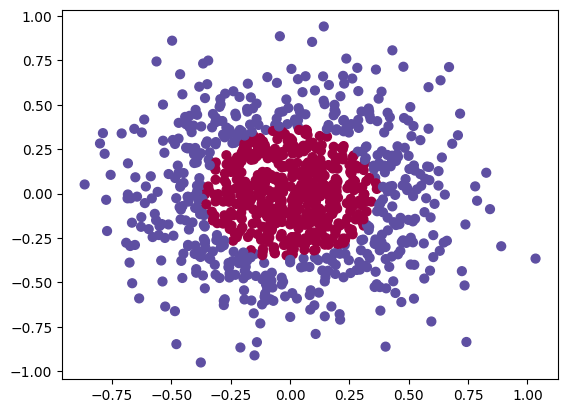

In [67]:
N = 1000 #Número de ejemplos

#Creamos círculos gaussianos
gaussian_quantiles = make_gaussian_quantiles(mean = None,
                                             cov = 0.1,      #Distribución de datos
                                             n_samples = N,  #Número de ejemplos
                                             n_features = 2, #Número de dimensiones
                                             n_classes = 2,  #Número de clases
                                             shuffle = True,
                                             random_state = None)

X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]

plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

#### FUNCIÓN DE INICIALIZACIÓN DE PARÁMETROS

In [77]:
#Función que recibe la información de las capas ocultas
def initialize_parameters_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)   
    
    #Creamos los pesos y bías de manera aleatoria
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1 #Vamos de -1 a 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
        
    return parameters

#### FUNCIONES DE ACTIVACIÓN

In [68]:
#Función sigmoide
def sigmoid(x, derivate = False):
    
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

#Función RELU
def relu(x, derivate = False):
    
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

In [69]:
x = np.linspace(-10,10,100)

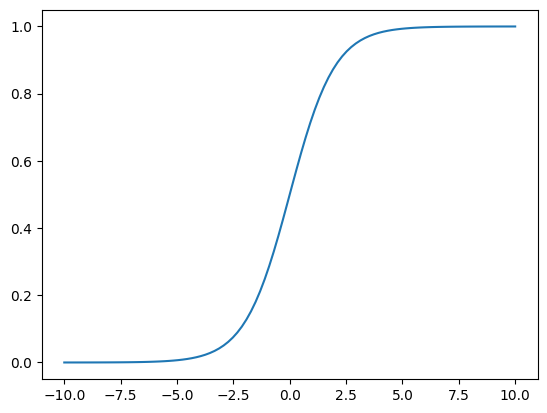

In [71]:
plt.plot(x,sigmoid(x));

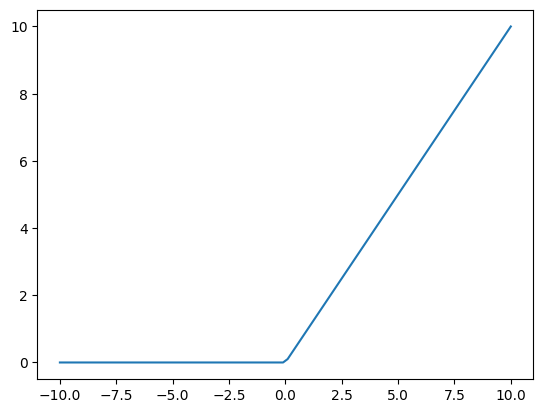

In [27]:
plt.plot(x, relu(x))
plt.show()

#### FUNCIÓN DE PÉRDIDA

In [73]:
def mse(y,y_hat,derivate=False):
    
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

In [48]:
a = np.array([[2,3],
[2,3],
[2,3]])

In [49]:
a.shape

(3, 2)

In [50]:
b = np.array([[1,6,5,2],
             [1,2,7,0]])

In [51]:
b.shape

(2, 4)

In [52]:
np.matmul(a,b)

array([[ 5, 18, 31,  4],
       [ 5, 18, 31,  4],
       [ 5, 18, 31,  4]])

In [53]:
a@b

array([[ 5, 18, 31,  4],
       [ 5, 18, 31,  4],
       [ 5, 18, 31,  4]])

#### FUNCIÓN DE ENTRENAMIENTO

In [80]:
def train(X_data,lr,params,training=True):
    
    # Forward
    params['A0'] = X_data
        
    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    
    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
       
    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])
  
    output = params['A3']
    
    if training:
        
        # Backpropagation
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])

        
        # Gradinet Descent:
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
    return output

#### ENTRENAMIENTO A LA RED

In [78]:
#2 features(capa inicial), 4 neuronas(capa oculta), 8 neuronas(capa oculta), 1 neurona (capa final)
layer_dims =[2, 4, 8, 1]

params = initialize_parameters_deep(layer_dims)
errors = []

for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.2580958304283497
0.24473470956769752
0.23619147540419305
0.22858220591051462
0.22114194332856063
0.21370629884345943
0.20683850265435222
0.20068168874245496
0.19545914069625914
0.19104993167969772
0.18746517590172698
0.18457163494871354
0.18221090437994172
0.18019242804526672
0.17846877624958232
0.17699968170318525
0.17566046058318005
0.17444927890952772
0.17330915568258384
0.17214426436111113
0.17096483877216526
0.17002157672054358
0.16921980231557623
0.16845325779575193
0.1677627919628412
0.16710694477565122
0.16650589037283867
0.16593109851528934
0.16539055907729286
0.16487839230406304
0.1643709722185595
0.1638973441712608
0.16344111778311105
0.16300649172222578
0.16258770373966103
0.1621735108357363
0.16176077544399664
0.16132956299483722
0.1609090509114849
0.16046506818833065
0.1599852280732409
0.15940104224126542
0.15868257029454436
0.15759143910187268
0.15548812982667345
0.15204882784374138
0.1449793009043195
0.1346436653666482
0.12644308739256602
0.12127854864723403
0.1169194

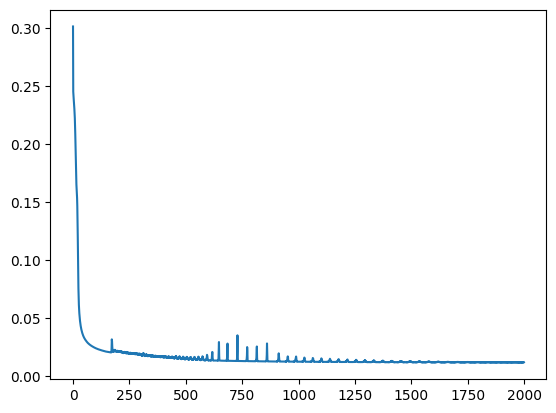

In [56]:
plt.plot(errors)

#### PROBANDO DATOS NUEVOS

In [57]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)

In [58]:
y = np.where(y >= 0.5, 1, 0)

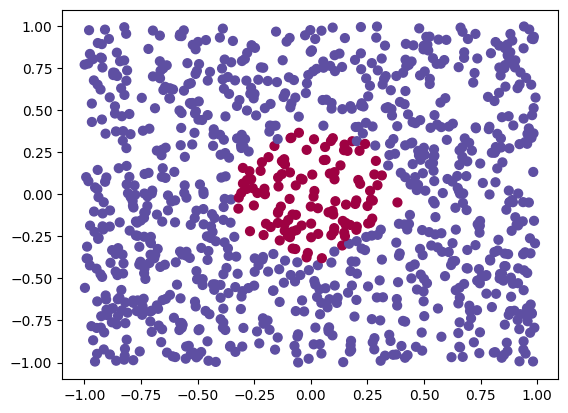

In [59]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);

#### MALLA DE VISUALIZACIÓN

In [60]:
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))

In [61]:
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)

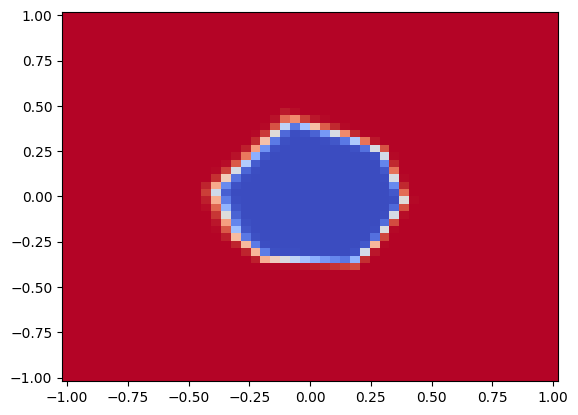

In [62]:
plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')